# Data processing
---


In [51]:
import pandas as pd
import csv
from datetime import datetime

romania_dataset = pd.read_csv("RomaniaData.csv")
bucuresti_dataset = pd.read_csv("Bucuresti.csv")

header = ["t_chg", "date", "tavg", "tmin", "tmax"]
with open('RomaniaDataV2.csv', 'w', encoding='UTF-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for row1, row2 in zip(romania_dataset.itertuples(), bucuresti_dataset.itertuples()):
        date = datetime.strptime(row1.date, '%d/%m/%Y').date()
        list = [row1.t_chg, date, row2.tavg+row1.t_chg, row2.tmin, row2.tmax]
        new_row = [str(i) for i in list]
        writer.writerow(new_row)

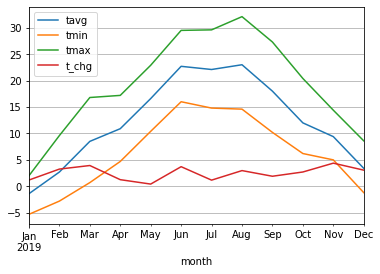

<Figure size 720x720 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt

df = pd.read_csv("RomaniaDataV2.csv")

min_date = '2019-01-01'
max_date = '2019-12-01'


df = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-12-01')]

df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

df.plot(y=['tavg', 'tmin', 'tmax', 't_chg'], x='month')
plt.grid()
plt.figure(figsize=(10,10))
plt.show()
